<h3>Import Necessary Libraries</h3>

In [1]:
import numpy as np
from keras import models
from keras import layers
from keras.callbacks import History
from keras.models import model_from_json
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import model_from_json


Using TensorFlow backend.


<h3>Loading the MNIST dataset in Keras</h3>

In [2]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()

<h3>Let's look at the dataset</h3>

In [8]:
print("Shape of train dataset: "+ str(train_images.shape))
print("Shape of test dataset: "+ str(train_images.shape))
print("Train labels :" + str(train_labels))
print("Test labels :" + str(test_labels))

Shape of train dataset: (60000, 28, 28)
Shape of test dataset: (60000, 28, 28)
Train labels :[5 0 4 ..., 5 6 8]
Test labels :[7 2 1 ..., 4 5 6]


<h3>Visualization of an Image in the Train dataset </h3>
<h4>This is how an image is saved in the dataset</h4>

In [20]:
index=9 # The image you want to see

print(train_images[index])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   

<h4>Visualization of the same image</h4>

Visualization of the same image


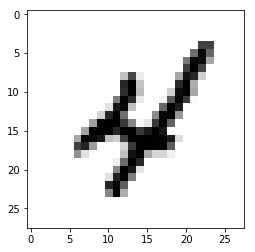

Given Label: 4


In [18]:
plt.imshow(train_images[index],cmap=plt.cm.binary)
plt.show()

print "Given Label: " + str(train_labels[index])

<h3>Network Architecture</h3>

In [64]:
network=models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

<h3>Preparing the image data</h3>

In [65]:
#Reshaping and normalising
train_images=train_images.reshape((60000,28*28))
test_images=test_images.reshape((10000,28*28))
print train_images.shape
print test_images.shape

#Normalising
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

(60000, 784)
(10000, 784)


In [66]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [67]:
h=network.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=5,batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s - loss: 0.2621 - acc: 0.9241 - val_loss: 0.1312 - val_acc: 0.9611
Epoch 2/5
60000/60000 [==============================] - 8s - loss: 0.1045 - acc: 0.9688 - val_loss: 0.0883 - val_acc: 0.9727
Epoch 3/5
60000/60000 [==============================] - 9s - loss: 0.0693 - acc: 0.9793 - val_loss: 0.0747 - val_acc: 0.9774
Epoch 4/5
60000/60000 [==============================] - 9s - loss: 0.0500 - acc: 0.9849 - val_loss: 0.0730 - val_acc: 0.9761
Epoch 5/5
60000/60000 [==============================] - 9s - loss: 0.0381 - acc: 0.9886 - val_loss: 0.0700 - val_acc: 0.9791


In [14]:
#Save the model

# serialize model to JSON
model_json = network.to_json()
with open("mnist_network.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
network.save_weights("mnist_network.h5")
print("Saved model to disk")

Saved model to disk


In [5]:
# load json and create model
json_file = open('../../mnist_network.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("../../mnist_network.h5")
print("Loaded model from disk")

Loaded model from disk


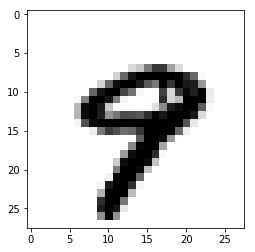

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


array([[  6.59456647e-12,   2.14200334e-13,   7.89395806e-12,
          1.09475434e-06,   2.00727867e-04,   1.03778524e-08,
          3.85230151e-13,   3.52416209e-05,   4.42574128e-06,
          9.99758542e-01]], dtype=float32)

In [79]:
index=9
digit=test_images[index]
plt.imshow(digit.reshape(28,28),cmap=plt.cm.binary)
plt.show()
print test_labels[index]
network.predict(test_images[index:index+1],batch_size=1,verbose=0)

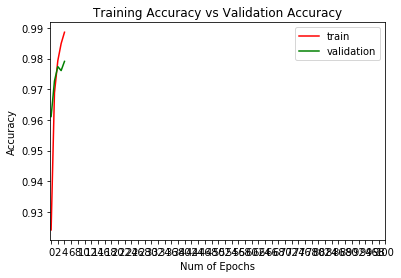

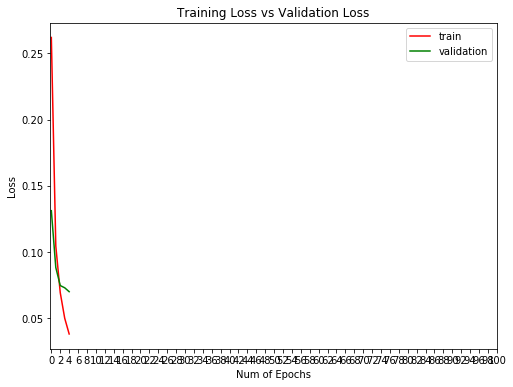

In [80]:
plt.figure(0)
plt.plot(h.history['acc'],'r')
plt.plot(h.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(h.history['loss'],'r')
plt.plot(h.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()